## Dues imatges de datashader: 
* Una amb tot
* l'altre sense els usuaris que tenen més de 10 ofertes 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from functools import partial
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import export_image
from datashader.colors import viridis, colormap_select

from colorcet import fire
from IPython.core.display import HTML, display

In [2]:
data = pd.read_csv('listings_1.csv')

C:\Users\Biel\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Imatge 1 (amb tot)

In [27]:
location = pd.DataFrame([data.longitude, data.latitude]).T

In [45]:
cm = partial(colormap_select)

cvs = ds.Canvas(plot_width=700, plot_height=700)
agg = cvs.points(location, 'longitude', 'latitude')#, ds.mean('z_col'))
img = tf.shade(agg, cmap=cm(fire, 0.2), how='eq_hist')

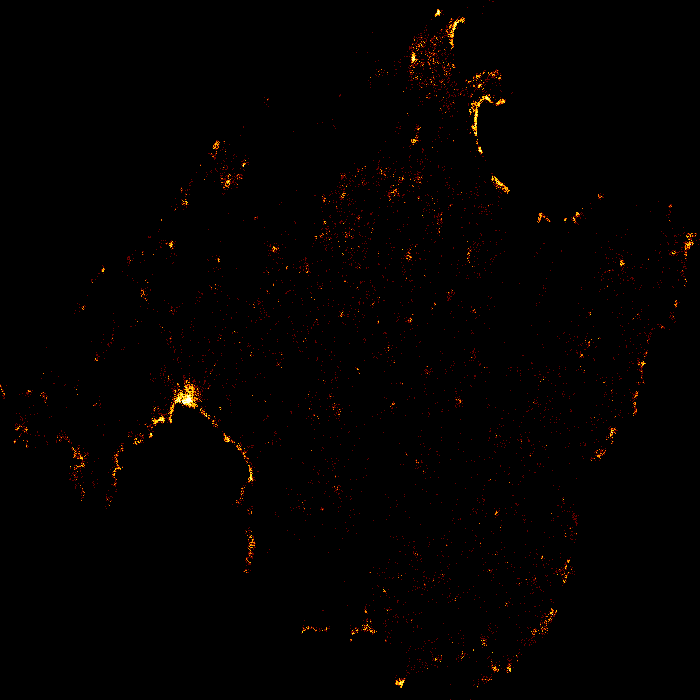

In [46]:
export_image(img,'datashader_total', background='black')

### Imatge 2: $n$ ofertes $< 10$

In [6]:
data['host_since'] = pd.to_datetime(data['host_since'])
data['host_timing']=np.ones(len(data))

In [7]:
host_id_amount = data.groupby(['host_id']).host_timing.sum()
host_id_amount = host_id_amount.sort_values(ascending=False)

In [32]:
less10 = host_id_amount[host_id_amount<5]

In [33]:
data_less10=data[data.host_id.isin(less10.index.values)]

In [34]:
location10 = pd.DataFrame([data_less10.longitude, data_less10.latitude]).T

In [49]:
cm = partial(colormap_select)

cvs = ds.Canvas(plot_width=700, plot_height=700)
agg = cvs.points(location10, 'longitude', 'latitude')#, ds.mean('z_col'))
img = tf.shade(agg, cmap=cm(fire, 0.2), how='eq_hist')

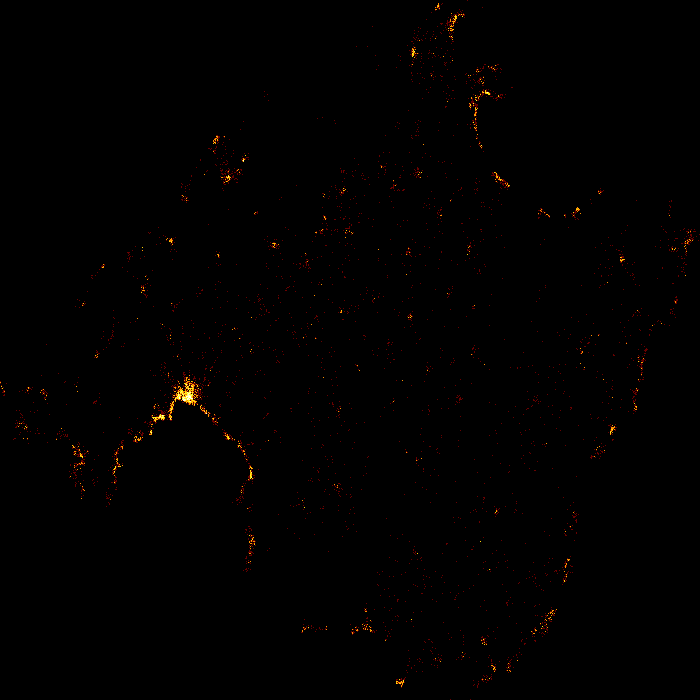

In [50]:
export_image(img,'datashader_less10', background='black')

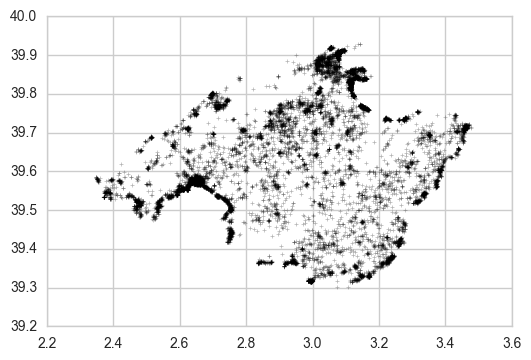

In [54]:
plt.scatter(location.longitude, location.latitude, marker='+',s=10, linewidths=0.5, alpha=0.3, c='k')

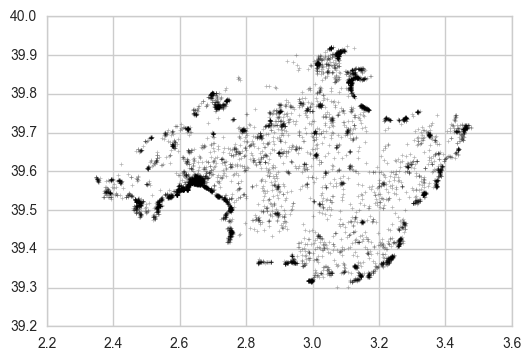

In [55]:
plt.scatter(location10.longitude, location10.latitude, marker='+',s=10, linewidths=0.5, alpha=0.3, c='k')